# 1. VGG16

In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.metrics import accuracy_score
import numpy as np
import random


SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

IMG_SIZE = 224
NUM_CLASSES = 20
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
y_train = y_train.flatten()
y_test = y_test.flatten()

selected_classes = random.sample(range(100), NUM_CLASSES)
class_map = {orig: new for new, orig in enumerate(selected_classes)}

test_mask = np.isin(y_test, selected_classes)
x_test, y_test = x_test[test_mask], y_test[test_mask]
y_test = np.vectorize(class_map.get)(y_test)

x_test = tf.image.resize(x_test, (IMG_SIZE, IMG_SIZE)).numpy()

vgg_16_test = preprocess_input(x_test)
base_model_vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model_vgg16.trainable = False

x = base_model_vgg16.output
x = GlobalAveragePooling2D()(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=output, name="VGG16")

model_vgg16.summary(show_trainable=True)

y_pred_probs = model_vgg16.predict(vgg_16_test, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

acc_vgg16 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_vgg16:.4f}")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


Model: "VGG16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer (InputLayer)    │ (None, 224, 224, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv1 (Conv2D)       │ (None, 224, 224, 64)  │      1,792 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv2 (Conv2D)       │ (None, 224, 224, 64)  │     36,928 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_pool (MaxPooling2D)  │ (None, 112, 112, 64)  │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv1 (Conv2D)       │ (None, 112, 112, 128) │     73,856 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv2 (Conv2D)       │ (None, 112, 112, 128) │    147,584 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_pool (MaxPooling2D)  │ (None, 56, 56, 128)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv1 (Conv2D)       │ (None, 56, 56, 256)   │    295,168 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv2 (Conv2D)       │ (None, 56, 56, 256)   │    590,080 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv3 (Conv2D)       │ (None, 56, 56, 256)   │    590,080 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_pool (MaxPooling2D)  │ (None, 28, 28, 256)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv1 (Conv2D)       │ (None, 28, 28, 512)   │  1,180,160 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv2 (Conv2D)       │ (None, 28, 28, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv3 (Conv2D)       │ (None, 28, 28, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_pool (MaxPooling2D)  │ (None, 14, 14, 512)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv1 (Conv2D)       │ (None, 14, 14, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv2 (Conv2D)       │ (None, 14, 14, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv3 (Conv2D)       │ (None, 14, 14, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_pool (MaxPooling2D)  │ (None, 7, 7, 512)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ global_average_pooling2d    │ (None, 512)           │          0 │   -   │
│ (GlobalAveragePooling2D)    │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense (Dense)               │ (None, 20)            │     10,260 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 14,724,948 (56.17 MB)

 Trainable params: 10,260 (40.08 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step
Accuracy: 0.0895


# 2. VGG19

In [2]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.metrics import accuracy_score
import numpy as np
import random


SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

IMG_SIZE = 224
NUM_CLASSES = 20
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
y_train = y_train.flatten()
y_test = y_test.flatten()

selected_classes = random.sample(range(100), NUM_CLASSES)
class_map = {orig: new for new, orig in enumerate(selected_classes)}

test_mask = np.isin(y_test, selected_classes)
x_test, y_test = x_test[test_mask], y_test[test_mask]
y_test = np.vectorize(class_map.get)(y_test)

x_test = tf.image.resize(x_test, (IMG_SIZE, IMG_SIZE)).numpy()

model_vgg19 = VGG19
vgg_19_test = preprocess_input(x_test)
base_model_vgg19 = VGG19(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model_vgg19.trainable = False

x = base_model_vgg19.output
x = GlobalAveragePooling2D()(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)
model_vgg19 = Model(inputs=base_model_vgg19.input, outputs=output, name="VGG19")

model_vgg19.summary(show_trainable=True)

y_pred_probs = model_vgg19.predict(vgg_19_test, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

acc_vgg19 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_vgg19:.4f}")


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 23s 0us/step


Model: "VGG19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_1 (InputLayer)  │ (None, 224, 224, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv1 (Conv2D)       │ (None, 224, 224, 64)  │      1,792 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv2 (Conv2D)       │ (None, 224, 224, 64)  │     36,928 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_pool (MaxPooling2D)  │ (None, 112, 112, 64)  │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv1 (Conv2D)       │ (None, 112, 112, 128) │     73,856 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv2 (Conv2D)       │ (None, 112, 112, 128) │    147,584 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_pool (MaxPooling2D)  │ (None, 56, 56, 128)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv1 (Conv2D)       │ (None, 56, 56, 256)   │    295,168 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv2 (Conv2D)       │ (None, 56, 56, 256)   │    590,080 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv3 (Conv2D)       │ (None, 56, 56, 256)   │    590,080 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv4 (Conv2D)       │ (None, 56, 56, 256)   │    590,080 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_pool (MaxPooling2D)  │ (None, 28, 28, 256)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv1 (Conv2D)       │ (None, 28, 28, 512)   │  1,180,160 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv2 (Conv2D)       │ (None, 28, 28, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv3 (Conv2D)       │ (None, 28, 28, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv4 (Conv2D)       │ (None, 28, 28, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_pool (MaxPooling2D)  │ (None, 14, 14, 512)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv1 (Conv2D)       │ (None, 14, 14, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv2 (Conv2D)       │ (None, 14, 14, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv3 (Conv2D)       │ (None, 14, 14, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv4 (Conv2D)       │ (None, 14, 14, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_pool (MaxPooling2D)  │ (None, 7, 7, 512)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ global_average_pooling2d_1  │ (None, 512)           │          0 │   -   │
│ (GlobalAveragePooling2D)    │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_1 (Dense)             │ (None, 20)            │     10,260 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴─────

 Total params: 20,034,644 (76.43 MB)

 Trainable params: 10,260 (40.08 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 172s 3s/step
Accuracy: 0.0310


# 3. Xception

In [3]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.metrics import accuracy_score
import numpy as np
import random


SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

IMG_SIZE = 224
NUM_CLASSES = 20
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
y_train = y_train.flatten()
y_test = y_test.flatten()

selected_classes = random.sample(range(100), NUM_CLASSES)
class_map = {orig: new for new, orig in enumerate(selected_classes)}

test_mask = np.isin(y_test, selected_classes)
x_test, y_test = x_test[test_mask], y_test[test_mask]
y_test = np.vectorize(class_map.get)(y_test)

x_test = tf.image.resize(x_test, (IMG_SIZE, IMG_SIZE)).numpy()

model_xception = Xception
xception_test = preprocess_input(x_test)

base_model_xception = Xception(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model_xception.trainable = False

x = base_model_xception.output
x = GlobalAveragePooling2D()(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)
model_xception = Model(inputs=base_model_xception.input, outputs=output, name="Xception")

model_xception.summary(show_trainable=True)

y_pred_probs = model_xception.predict(xception_test, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

acc_xception = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_xception:.4f}")


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 27s 0us/step


Model: "Xception"

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)      ┃ Output Shape    ┃   Param # ┃ Connected to   ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_2     │ (None, 224,     │         0 │ -              │   -   │
│ (InputLayer)      │ 224, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block1_conv1      │ (None, 111,     │       864 │ input_layer_2… │   N   │
│ (Conv2D)          │ 111, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block1_conv1_bn   │ (None, 111,     │       128 │ block1_conv1[… │   N   │
│ (BatchNormalizat… │ 111, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block1_conv1_act  │ (None, 111,     │         0 │ block1_conv1_… │   -   │
│ (Activation)      │ 111, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block1_conv2      │ (None, 109,     │    18,432 │ block1_conv1_… │   N   │
│ (Conv2D)          │ 109, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block1_conv2_bn   │ (None, 109,     │       256 │ block1_conv2[… │   N   │
│ (BatchNormalizat… │ 109, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block1_conv2_act  │ (None, 109,     │         0 │ block1_conv2_… │   -   │
│ (Activation)      │ 109, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block2_sepconv1   │ (None, 109,     │     8,768 │ block1_conv2_… │   N   │
│ (SeparableConv2D) │ 109, 128)       │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block2_sepconv1_… │ (None, 109,     │       512 │ block2_sepcon… │   N   │
│ (BatchNormalizat… │ 109, 128)       │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block2_sepconv2_… │ (None, 109,     │         0 │ block2_sepcon… │   -   │
│ (Activation)      │ 109, 128)       │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block2_sepconv2   │ (None, 109,     │    17,536 │ block2_sepcon… │   N   │
│ (SeparableConv2D) │ 109, 128)       │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block2_sepconv2_… │ (None, 109,     │       512 │ block2_sepcon… │   N   │
│ (BatchNormalizat… │ 109, 128)       │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2d (Conv2D)   │ (None, 55, 55,  │     8,192 │ block1_conv2_… │   N   │
│                   │ 128)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block2_pool       │ (None, 55, 55,  │         0 │ block2_sepcon… │   -   │
│ (MaxPooling2D)    │ 128)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ batch_normalizat… │ (None, 55, 55,  │       512 │ conv2d[0][0]   │   N   │
│ (BatchNormalizat… │ 128)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ add (Add)         │ (None, 55, 55,  │         0 │ block2_pool[0… │   -   │
│                   │ 128)            │           │ batch_normali… │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block3_sepconv1_… │ (None, 55, 55,  │         0 │ add[0][0]      │   - 

 Total params: 20,902,460 (79.74 MB)

 Trainable params: 40,980 (160.08 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step
Accuracy: 0.0520


# 4. ResNet50

In [4]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.metrics import accuracy_score
import numpy as np
import random


SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

IMG_SIZE = 224
NUM_CLASSES = 20
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
y_train = y_train.flatten()
y_test = y_test.flatten()

selected_classes = random.sample(range(100), NUM_CLASSES)
class_map = {orig: new for new, orig in enumerate(selected_classes)}

test_mask = np.isin(y_test, selected_classes)
x_test, y_test = x_test[test_mask], y_test[test_mask]
y_test = np.vectorize(class_map.get)(y_test)

x_test = tf.image.resize(x_test, (IMG_SIZE, IMG_SIZE)).numpy()

model_ResNet50 = ResNet50
ResNet50_test = preprocess_input(x_test)
base_model_ResNet50 = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model_ResNet50.trainable = False

x = base_model_ResNet50.output
x = GlobalAveragePooling2D()(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)
model_resnet50 = Model(inputs=base_model_ResNet50.input, outputs=output, name="ResNet50")

model_resnet50.summary(show_trainable=True)

y_pred_probs = model_resnet50.predict(ResNet50_test, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

acc_resnet50 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_resnet50:.4f}")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 28s 0us/step


Model: "ResNet50"

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)      ┃ Output Shape    ┃   Param # ┃ Connected to   ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_3     │ (None, 224,     │         0 │ -              │   -   │
│ (InputLayer)      │ 224, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv1_pad         │ (None, 230,     │         0 │ input_layer_3… │   -   │
│ (ZeroPadding2D)   │ 230, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv1_conv        │ (None, 112,     │     9,472 │ conv1_pad[0][… │   N   │
│ (Conv2D)          │ 112, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv1_bn          │ (None, 112,     │       256 │ conv1_conv[0]… │   N   │
│ (BatchNormalizat… │ 112, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv1_relu        │ (None, 112,     │         0 │ conv1_bn[0][0] │   -   │
│ (Activation)      │ 112, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ pool1_pad         │ (None, 114,     │         0 │ conv1_relu[0]… │   -   │
│ (ZeroPadding2D)   │ 114, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ pool1_pool        │ (None, 56, 56,  │         0 │ pool1_pad[0][… │   -   │
│ (MaxPooling2D)    │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_1_c… │ (None, 56, 56,  │     4,160 │ pool1_pool[0]… │   N   │
│ (Conv2D)          │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_1_bn │ (None, 56, 56,  │       256 │ conv2_block1_… │   N   │
│ (BatchNormalizat… │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_1_r… │ (None, 56, 56,  │         0 │ conv2_block1_… │   -   │
│ (Activation)      │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_2_c… │ (None, 56, 56,  │    36,928 │ conv2_block1_… │   N   │
│ (Conv2D)          │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_2_bn │ (None, 56, 56,  │       256 │ conv2_block1_… │   N   │
│ (BatchNormalizat… │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_2_r… │ (None, 56, 56,  │         0 │ conv2_block1_… │   -   │
│ (Activation)      │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_0_c… │ (None, 56, 56,  │    16,640 │ pool1_pool[0]… │   N   │
│ (Conv2D)          │ 256)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_3_c… │ (None, 56, 56,  │    16,640 │ conv2_block1_… │   N   │
│ (Conv2D)          │ 256)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_0_bn │ (None, 56, 56,  │     1,024 │ conv2_block1_… │   N   │
│ (BatchNormalizat… │ 256)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_3_bn │ (None, 56, 56,  │     1,024 │ conv2_block1_… │   N 

 Total params: 23,628,692 (90.14 MB)

 Trainable params: 40,980 (160.08 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 60s 926ms/step
Accuracy: 0.0725


# 5. ResNet50V2

In [5]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.metrics import accuracy_score
import numpy as np
import random


SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

IMG_SIZE = 224
NUM_CLASSES = 20
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
y_train = y_train.flatten()
y_test = y_test.flatten()

selected_classes = random.sample(range(100), NUM_CLASSES)
class_map = {orig: new for new, orig in enumerate(selected_classes)}

test_mask = np.isin(y_test, selected_classes)
x_test, y_test = x_test[test_mask], y_test[test_mask]
y_test = np.vectorize(class_map.get)(y_test)

x_test = tf.image.resize(x_test, (IMG_SIZE, IMG_SIZE)).numpy()

model_ResNet50V2 = ResNet50V2
ResNet50V2_test = preprocess_input(x_test)
base_model_ResNet50V2 = ResNet50V2(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model_ResNet50V2.trainable = False

x = base_model_ResNet50V2.output
x = GlobalAveragePooling2D()(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)
model_resnet50v2 = Model(inputs=base_model_ResNet50V2.input, outputs=output, name="ResNet50V2")

model_resnet50v2.summary(show_trainable=True)

y_pred_probs = model_resnet50v2.predict(ResNet50V2_test, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

acc_resnet50v2 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_resnet50v2:.4f}")


94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 27s 0us/step


Model: "ResNet50V2"

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)      ┃ Output Shape    ┃   Param # ┃ Connected to   ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_4     │ (None, 224,     │         0 │ -              │   -   │
│ (InputLayer)      │ 224, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv1_pad         │ (None, 230,     │         0 │ input_layer_4… │   -   │
│ (ZeroPadding2D)   │ 230, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv1_conv        │ (None, 112,     │     9,472 │ conv1_pad[0][… │   N   │
│ (Conv2D)          │ 112, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ pool1_pad         │ (None, 114,     │         0 │ conv1_conv[0]… │   -   │
│ (ZeroPadding2D)   │ 114, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ pool1_pool        │ (None, 56, 56,  │         0 │ pool1_pad[0][… │   -   │
│ (MaxPooling2D)    │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_pre… │ (None, 56, 56,  │       256 │ pool1_pool[0]… │   N   │
│ (BatchNormalizat… │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_pre… │ (None, 56, 56,  │         0 │ conv2_block1_… │   -   │
│ (Activation)      │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_1_c… │ (None, 56, 56,  │     4,096 │ conv2_block1_… │   N   │
│ (Conv2D)          │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_1_bn │ (None, 56, 56,  │       256 │ conv2_block1_… │   N   │
│ (BatchNormalizat… │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_1_r… │ (None, 56, 56,  │         0 │ conv2_block1_… │   -   │
│ (Activation)      │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_2_p… │ (None, 58, 58,  │         0 │ conv2_block1_… │   -   │
│ (ZeroPadding2D)   │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_2_c… │ (None, 56, 56,  │    36,864 │ conv2_block1_… │   N   │
│ (Conv2D)          │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_2_bn │ (None, 56, 56,  │       256 │ conv2_block1_… │   N   │
│ (BatchNormalizat… │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_2_r… │ (None, 56, 56,  │         0 │ conv2_block1_… │   -   │
│ (Activation)      │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_0_c… │ (None, 56, 56,  │    16,640 │ conv2_block1_… │   N   │
│ (Conv2D)          │ 256)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_3_c… │ (None, 56, 56,  │    16,640 │ conv2_block1_… │   N   │
│ (Conv2D)          │ 256)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_out  │ (None, 56, 56,  │         0 │ conv2_block1_… │   - 

 Total params: 23,605,780 (90.05 MB)

 Trainable params: 40,980 (160.08 KB)

 Non-trainable params: 23,564,800 (89.89 MB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 53s 810ms/step
Accuracy: 0.0700


# 6. InceptionV3

In [6]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.metrics import accuracy_score
import numpy as np
import random


SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

IMG_SIZE = 224
NUM_CLASSES = 20
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
y_train = y_train.flatten()
y_test = y_test.flatten()

selected_classes = random.sample(range(100), NUM_CLASSES)
class_map = {orig: new for new, orig in enumerate(selected_classes)}

test_mask = np.isin(y_test, selected_classes)
x_test, y_test = x_test[test_mask], y_test[test_mask]
y_test = np.vectorize(class_map.get)(y_test)

x_test = tf.image.resize(x_test, (IMG_SIZE, IMG_SIZE)).numpy()

model_inceptionv3 = InceptionV3
inception_test = preprocess_input(x_test)
base_model_inceptionv3 = InceptionV3(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model_inceptionv3.trainable = False

x = base_model_inceptionv3.output
x = GlobalAveragePooling2D()(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)
model_inceptionv3 = Model(inputs=base_model_inceptionv3.input, outputs=output, name="InceptionV3")

model_inceptionv3.summary(show_trainable=True)

y_pred_probs = model_inceptionv3.predict(inception_test, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

acc_inceptionv3 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_inceptionv3:.4f}")


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


Model: "InceptionV3"

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)      ┃ Output Shape    ┃   Param # ┃ Connected to   ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_5     │ (None, 224,     │         0 │ -              │   -   │
│ (InputLayer)      │ 224, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2d_4 (Conv2D) │ (None, 111,     │       864 │ input_layer_5… │   N   │
│                   │ 111, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ batch_normalizat… │ (None, 111,     │        96 │ conv2d_4[0][0] │   N   │
│ (BatchNormalizat… │ 111, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ activation        │ (None, 111,     │         0 │ batch_normali… │   -   │
│ (Activation)      │ 111, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2d_5 (Conv2D) │ (None, 109,     │     9,216 │ activation[0]… │   N   │
│                   │ 109, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ batch_normalizat… │ (None, 109,     │        96 │ conv2d_5[0][0] │   N   │
│ (BatchNormalizat… │ 109, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ activation_1      │ (None, 109,     │         0 │ batch_normali… │   -   │
│ (Activation)      │ 109, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2d_6 (Conv2D) │ (None, 109,     │    18,432 │ activation_1[… │   N   │
│                   │ 109, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ batch_normalizat… │ (None, 109,     │       192 │ conv2d_6[0][0] │   N   │
│ (BatchNormalizat… │ 109, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ activation_2      │ (None, 109,     │         0 │ batch_normali… │   -   │
│ (Activation)      │ 109, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ max_pooling2d_3   │ (None, 54, 54,  │         0 │ activation_2[… │   -   │
│ (MaxPooling2D)    │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2d_7 (Conv2D) │ (None, 54, 54,  │     5,120 │ max_pooling2d… │   N   │
│                   │ 80)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ batch_normalizat… │ (None, 54, 54,  │       240 │ conv2d_7[0][0] │   N   │
│ (BatchNormalizat… │ 80)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ activation_3      │ (None, 54, 54,  │         0 │ batch_normali… │   -   │
│ (Activation)      │ 80)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2d_8 (Conv2D) │ (None, 52, 52,  │   138,240 │ activation_3[… │   N   │
│                   │ 192)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ batch_normalizat… │ (None, 52, 52,  │       576 │ conv2d_8[0][0] │   N   │
│ (BatchNormalizat… │ 192)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ activation_4      │ (None, 52, 52,  │         0 │ batch_normali… │   - 

 Total params: 21,843,764 (83.33 MB)

 Trainable params: 40,980 (160.08 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 548ms/step
Accuracy: 0.0430


# 7. MobileNetV2

In [7]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.metrics import accuracy_score
import numpy as np
import random


SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

IMG_SIZE = 224
NUM_CLASSES = 20
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
y_train = y_train.flatten()
y_test = y_test.flatten()

selected_classes = random.sample(range(100), NUM_CLASSES)
class_map = {orig: new for new, orig in enumerate(selected_classes)}

test_mask = np.isin(y_test, selected_classes)
x_test, y_test = x_test[test_mask], y_test[test_mask]
y_test = np.vectorize(class_map.get)(y_test)

x_test = tf.image.resize(x_test, (IMG_SIZE, IMG_SIZE)).numpy()

mobileNetV2_test = preprocess_input(x_test)
base_model_mobileNetV2 = MobileNetV2(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model_mobileNetV2.trainable = False

x = base_model_mobileNetV2.output
x = GlobalAveragePooling2D()(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)
model_mobilenetV2 = Model(inputs=base_model_mobileNetV2.input, outputs=output, name="MobileNetV2")

model_mobilenetV2.summary(show_trainable=True)

y_pred_probs = model_mobilenetV2.predict(mobileNetV2_test, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

acc_mobilenetv2 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_mobilenetv2:.4f}")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "MobileNetV2"

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)      ┃ Output Shape    ┃   Param # ┃ Connected to   ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_6     │ (None, 224,     │         0 │ -              │   -   │
│ (InputLayer)      │ 224, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ Conv1 (Conv2D)    │ (None, 112,     │       864 │ input_layer_6… │   N   │
│                   │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ bn_Conv1          │ (None, 112,     │       128 │ Conv1[0][0]    │   N   │
│ (BatchNormalizat… │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ Conv1_relu (ReLU) │ (None, 112,     │         0 │ bn_Conv1[0][0] │   -   │
│                   │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ expanded_conv_de… │ (None, 112,     │       288 │ Conv1_relu[0]… │   N   │
│ (DepthwiseConv2D) │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ expanded_conv_de… │ (None, 112,     │       128 │ expanded_conv… │   N   │
│ (BatchNormalizat… │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ expanded_conv_de… │ (None, 112,     │         0 │ expanded_conv… │   -   │
│ (ReLU)            │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ expanded_conv_pr… │ (None, 112,     │       512 │ expanded_conv… │   N   │
│ (Conv2D)          │ 112, 16)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ expanded_conv_pr… │ (None, 112,     │        64 │ expanded_conv… │   N   │
│ (BatchNormalizat… │ 112, 16)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_expand    │ (None, 112,     │     1,536 │ expanded_conv… │   N   │
│ (Conv2D)          │ 112, 96)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_expand_BN │ (None, 112,     │       384 │ block_1_expan… │   N   │
│ (BatchNormalizat… │ 112, 96)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_expand_r… │ (None, 112,     │         0 │ block_1_expan… │   -   │
│ (ReLU)            │ 112, 96)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_pad       │ (None, 113,     │         0 │ block_1_expan… │   -   │
│ (ZeroPadding2D)   │ 113, 96)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_depthwise │ (None, 56, 56,  │       864 │ block_1_pad[0… │   N   │
│ (DepthwiseConv2D) │ 96)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_depthwis… │ (None, 56, 56,  │       384 │ block_1_depth… │   N   │
│ (BatchNormalizat… │ 96)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_depthwis… │ (None, 56, 56,  │         0 │ block_1_depth… │   -   │
│ (ReLU)            │ 96)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_project   │ (None, 56, 56,  │     2,304 │ block_1_depth… │   N 

 Total params: 2,283,604 (8.71 MB)

 Trainable params: 25,620 (100.08 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 365ms/step
Accuracy: 0.0260


# 8. EfficientNetB0

In [8]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.metrics import accuracy_score
import numpy as np
import random


SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

IMG_SIZE = 224
NUM_CLASSES = 20
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
y_train = y_train.flatten()
y_test = y_test.flatten()

selected_classes = random.sample(range(100), NUM_CLASSES)
class_map = {orig: new for new, orig in enumerate(selected_classes)}

test_mask = np.isin(y_test, selected_classes)
x_test, y_test = x_test[test_mask], y_test[test_mask]
y_test = np.vectorize(class_map.get)(y_test)

x_test = tf.image.resize(x_test, (IMG_SIZE, IMG_SIZE)).numpy()

model_EfficientNetB0 = EfficientNetB0
EfficientNetB0_test = preprocess_input(x_test)
base_model_EfficientNetB0 = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model_EfficientNetB0.trainable = False

x = base_model_EfficientNetB0.output
x = GlobalAveragePooling2D()(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)
model_efficientNetB0 = Model(inputs=base_model_EfficientNetB0.input, outputs=output, name="EfficientNetB0")

model_efficientNetB0.summary(show_trainable=True)

y_pred_probs = model_efficientNetB0.predict(EfficientNetB0_test, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

acc_efficientnetb0 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_efficientnetb0:.4f}")

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "EfficientNetB0"

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)      ┃ Output Shape    ┃   Param # ┃ Connected to   ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_7     │ (None, 224,     │         0 │ -              │   -   │
│ (InputLayer)      │ 224, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ rescaling         │ (None, 224,     │         0 │ input_layer_7… │   -   │
│ (Rescaling)       │ 224, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ normalization     │ (None, 224,     │         7 │ rescaling[0][… │   N   │
│ (Normalization)   │ 224, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ rescaling_1       │ (None, 224,     │         0 │ normalization… │   -   │
│ (Rescaling)       │ 224, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ stem_conv_pad     │ (None, 225,     │         0 │ rescaling_1[0… │   -   │
│ (ZeroPadding2D)   │ 225, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ stem_conv         │ (None, 112,     │       864 │ stem_conv_pad… │   N   │
│ (Conv2D)          │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ stem_bn           │ (None, 112,     │       128 │ stem_conv[0][… │   N   │
│ (BatchNormalizat… │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ stem_activation   │ (None, 112,     │         0 │ stem_bn[0][0]  │   -   │
│ (Activation)      │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block1a_dwconv    │ (None, 112,     │       288 │ stem_activati… │   N   │
│ (DepthwiseConv2D) │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block1a_bn        │ (None, 112,     │       128 │ block1a_dwcon… │   N   │
│ (BatchNormalizat… │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block1a_activati… │ (None, 112,     │         0 │ block1a_bn[0]… │   -   │
│ (Activation)      │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block1a_se_squee… │ (None, 32)      │         0 │ block1a_activ… │   -   │
│ (GlobalAveragePo… │                 │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block1a_se_resha… │ (None, 1, 1,    │         0 │ block1a_se_sq… │   -   │
│ (Reshape)         │ 32)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block1a_se_reduce │ (None, 1, 1, 8) │       264 │ block1a_se_re… │   N   │
│ (Conv2D)          │                 │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block1a_se_expand │ (None, 1, 1,    │       288 │ block1a_se_re… │   N   │
│ (Conv2D)          │ 32)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block1a_se_excite │ (None, 112,     │         0 │ block1a_activ… │   -   │
│ (Multiply)        │ 112, 32)        │           │ block1a_se_ex… │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block1a_project_… │ (None, 112,     │       512 │ block1a_se_ex… │   N 

 Total params: 4,075,191 (15.55 MB)

 Trainable params: 25,620 (100.08 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 481ms/step
Accuracy: 0.0460


# 9. DenseNet121

In [9]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.metrics import accuracy_score
import numpy as np
import random


SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

IMG_SIZE = 224
NUM_CLASSES = 20
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
y_train = y_train.flatten()
y_test = y_test.flatten()

selected_classes = random.sample(range(100), NUM_CLASSES)
class_map = {orig: new for new, orig in enumerate(selected_classes)}

test_mask = np.isin(y_test, selected_classes)
x_test, y_test = x_test[test_mask], y_test[test_mask]
y_test = np.vectorize(class_map.get)(y_test)

x_test = tf.image.resize(x_test, (IMG_SIZE, IMG_SIZE)).numpy()

denseNet121_test = preprocess_input(x_test)
base_model_denseNet121 = DenseNet121(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model_denseNet121.trainable = False

x = base_model_denseNet121.output
x = GlobalAveragePooling2D()(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)
model_denseNet121 = Model(inputs=base_model_denseNet121.input, outputs=output, name="DenseNet121")

model_denseNet121.summary(show_trainable=True)

y_pred_probs = model_denseNet121.predict(denseNet121_test, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

acc_denseNet121 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_denseNet121:.4f}")

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


Model: "DenseNet121"

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)      ┃ Output Shape    ┃   Param # ┃ Connected to   ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_8     │ (None, 224,     │         0 │ -              │   -   │
│ (InputLayer)      │ 224, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ zero_padding2d    │ (None, 230,     │         0 │ input_layer_8… │   -   │
│ (ZeroPadding2D)   │ 230, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv1_conv        │ (None, 112,     │     9,408 │ zero_padding2… │   N   │
│ (Conv2D)          │ 112, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv1_bn          │ (None, 112,     │       256 │ conv1_conv[0]… │   N   │
│ (BatchNormalizat… │ 112, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv1_relu        │ (None, 112,     │         0 │ conv1_bn[0][0] │   -   │
│ (Activation)      │ 112, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ zero_padding2d_1  │ (None, 114,     │         0 │ conv1_relu[0]… │   -   │
│ (ZeroPadding2D)   │ 114, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ pool1             │ (None, 56, 56,  │         0 │ zero_padding2… │   -   │
│ (MaxPooling2D)    │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_0_bn │ (None, 56, 56,  │       256 │ pool1[0][0]    │   N   │
│ (BatchNormalizat… │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_0_r… │ (None, 56, 56,  │         0 │ conv2_block1_… │   -   │
│ (Activation)      │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_1_c… │ (None, 56, 56,  │     8,192 │ conv2_block1_… │   N   │
│ (Conv2D)          │ 128)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_1_bn │ (None, 56, 56,  │       512 │ conv2_block1_… │   N   │
│ (BatchNormalizat… │ 128)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_1_r… │ (None, 56, 56,  │         0 │ conv2_block1_… │   -   │
│ (Activation)      │ 128)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_2_c… │ (None, 56, 56,  │    36,864 │ conv2_block1_… │   N   │
│ (Conv2D)          │ 32)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_con… │ (None, 56, 56,  │         0 │ pool1[0][0],   │   -   │
│ (Concatenate)     │ 96)             │           │ conv2_block1_… │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block2_0_bn │ (None, 56, 56,  │       384 │ conv2_block1_… │   N   │
│ (BatchNormalizat… │ 96)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block2_0_r… │ (None, 56, 56,  │         0 │ conv2_block2_… │   -   │
│ (Activation)      │ 96)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block2_1_c… │ (None, 56, 56,  │    12,288 │ conv2_block2_… │   N 

 Total params: 7,058,004 (26.92 MB)

 Trainable params: 20,500 (80.08 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step
Accuracy: 0.0580


# 10. NasNetMobile

In [ ]:
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.applications.nasnet import preprocess_input
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.metrics import accuracy_score
import numpy as np
import random


SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

IMG_SIZE = 224
NUM_CLASSES = 20
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
y_train = y_train.flatten()
y_test = y_test.flatten()

selected_classes = random.sample(range(100), NUM_CLASSES)
class_map = {orig: new for new, orig in enumerate(selected_classes)}

test_mask = np.isin(y_test, selected_classes)
x_test, y_test = x_test[test_mask], y_test[test_mask]
y_test = np.vectorize(class_map.get)(y_test)

x_test = tf.image.resize(x_test, (IMG_SIZE, IMG_SIZE)).numpy()

nasaNetMobile_test = preprocess_input(x_test)
base_model_nasNetMobile = NASNetMobile(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model_nasNetMobile.trainable = False

x = base_model_nasNetMobile.output
x = GlobalAveragePooling2D()(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)
model_nasNetMobile = Model(inputs=base_model_nasNetMobile.input, outputs=output, name="NASNetMobile")

model_nasNetMobile.summary(show_trainable=True)

y_pred_probs = model_nasNetMobile.predict(nasaNetMobile_test, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

acc_nasNetMobile = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_nasNetMobile:.4f}")

19993432/19993432 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Model: "NASNetMobile"

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)      ┃ Output Shape    ┃   Param # ┃ Connected to   ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_9     │ (None, 224,     │         0 │ -              │   -   │
│ (InputLayer)      │ 224, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ stem_conv1        │ (None, 111,     │       864 │ input_layer_9… │   N   │
│ (Conv2D)          │ 111, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ stem_bn1          │ (None, 111,     │       128 │ stem_conv1[0]… │   N   │
│ (BatchNormalizat… │ 111, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ activation_94     │ (None, 111,     │         0 │ stem_bn1[0][0] │   -   │
│ (Activation)      │ 111, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ reduction_conv_1… │ (None, 111,     │       352 │ activation_94… │   N   │
│ (Conv2D)          │ 111, 11)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ reduction_bn_1_s… │ (None, 111,     │        44 │ reduction_con… │   N   │
│ (BatchNormalizat… │ 111, 11)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ activation_95     │ (None, 111,     │         0 │ reduction_bn_… │   -   │
│ (Activation)      │ 111, 11)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ activation_97     │ (None, 111,     │         0 │ stem_bn1[0][0] │   -   │
│ (Activation)      │ 111, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ separable_conv_1… │ (None, 115,     │         0 │ activation_95… │   -   │
│ (ZeroPadding2D)   │ 115, 11)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ separable_conv_1… │ (None, 117,     │         0 │ activation_97… │   -   │
│ (ZeroPadding2D)   │ 117, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ separable_conv_1… │ (None, 56, 56,  │       396 │ separable_con… │   N   │
│ (SeparableConv2D) │ 11)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ separable_conv_1… │ (None, 56, 56,  │     1,920 │ separable_con… │   N   │
│ (SeparableConv2D) │ 11)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ separable_conv_1… │ (None, 56, 56,  │        44 │ separable_con… │   N   │
│ (BatchNormalizat… │ 11)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ separable_conv_1… │ (None, 56, 56,  │        44 │ separable_con… │   N   │
│ (BatchNormalizat… │ 11)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ activation_96     │ (None, 56, 56,  │         0 │ separable_con… │   -   │
│ (Activation)      │ 11)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ activation_98     │ (None, 56, 56,  │         0 │ separable_con… │   -   │
│ (Activation)      │ 11)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ separable_conv_2… │ (None, 56, 56,  │       396 │ activation_96… │   N 

 Total params: 4,290,856 (16.37 MB)

 Trainable params: 21,140 (82.58 KB)

 Non-trainable params: 4,269,716 (16.29 MB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 484ms/step
Accuracy: 0.0580


In [ ]:
from collections import Counter
from tensorflow.keras.models import Model

models = [model_vgg16, model_vgg19, model_xception, model_resnet50, model_resnet50v2, model_inceptionv3, model_mobilenetV2, model_efficientNetB0, model_denseNet121, model_nasNetMobile]
model_names = ["VGG16", "VGG19", "Xception", "ResNet50", "ResNet50V2", "InceptionV3", "MobileNetV2", "EfficientNetB0", "DenseNet121", "NasNetMobile"]
model_acc = [acc_vgg16, acc_vgg19, acc_xception, acc_resnet50, acc_resnet50v2, acc_inceptionv3, acc_mobilenetv2, acc_efficientnetb0, acc_denseNet121, acc_nasNetMobile]

for model, name, acc in zip(models, model_names, model_acc):
    layer_types = [type(layer).__name__ for layer in model.layers]
    layer_type_counts = Counter(layer_types)

    print(f"\n{name} Accuracy score: {acc}")
    print(f"{name} Layer Type Counts:")
    for layer_type, count in layer_type_counts.items():
        print(f"{layer_type}: {count}")


VGG16 Accuracy score: 0.0895
VGG16 Layer Type Counts:
InputLayer: 1
Conv2D: 13
MaxPooling2D: 5
GlobalAveragePooling2D: 1
Dense: 1

VGG19 Accuracy score: 0.031
VGG19 Layer Type Counts:
InputLayer: 1
Conv2D: 16
MaxPooling2D: 5
GlobalAveragePooling2D: 1
Dense: 1

Xception Accuracy score: 0.052
Xception Layer Type Counts:
InputLayer: 1
Conv2D: 6
BatchNormalization: 40
Activation: 35
SeparableConv2D: 34
MaxPooling2D: 4
Add: 12
GlobalAveragePooling2D: 1
Dense: 1

ResNet50 Accuracy score: 0.0725
ResNet50 Layer Type Counts:
InputLayer: 1
ZeroPadding2D: 2
Conv2D: 53
BatchNormalization: 53
Activation: 49
MaxPooling2D: 1
Add: 16
GlobalAveragePooling2D: 1
Dense: 1

ResNet50V2 Accuracy score: 0.07
ResNet50V2 Layer Type Counts:
InputLayer: 1
ZeroPadding2D: 18
Conv2D: 53
MaxPooling2D: 4
BatchNormalization: 49
Activation: 49
Add: 16
GlobalAveragePooling2D: 1
Dense: 1

InceptionV3 Accuracy score: 0.043
InceptionV3 Layer Type Counts:
InputLayer: 1
Conv2D: 94
BatchNormalization: 94
Activation: 94
MaxPoo

C:\Users\12\AppData\Local\Temp\ipykernel_11876\643223892.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="Blues_d")


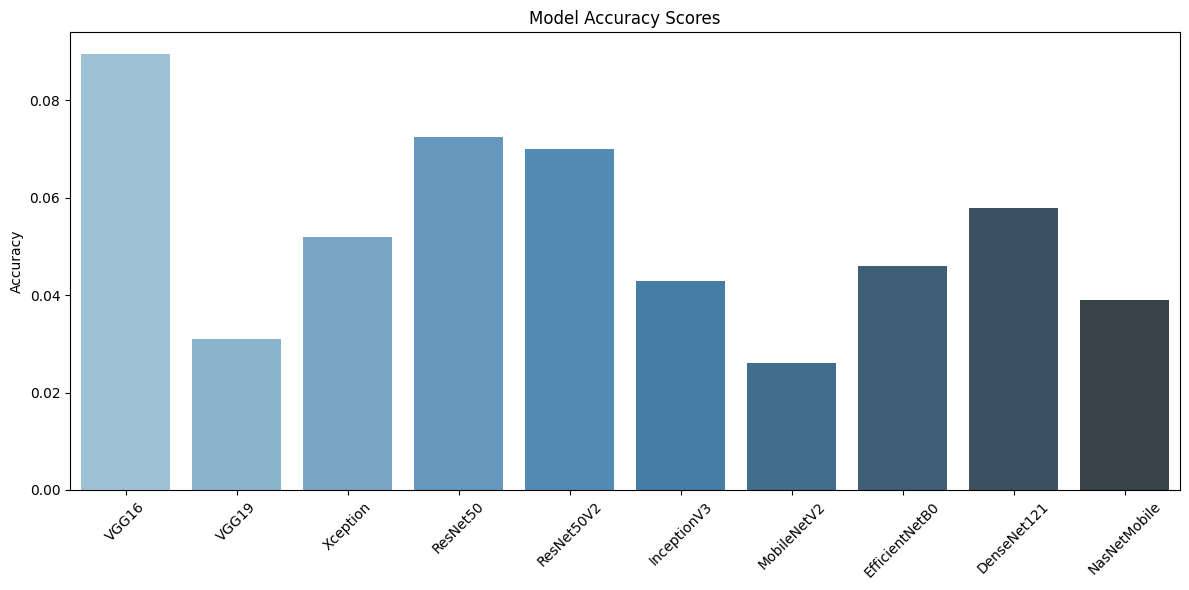

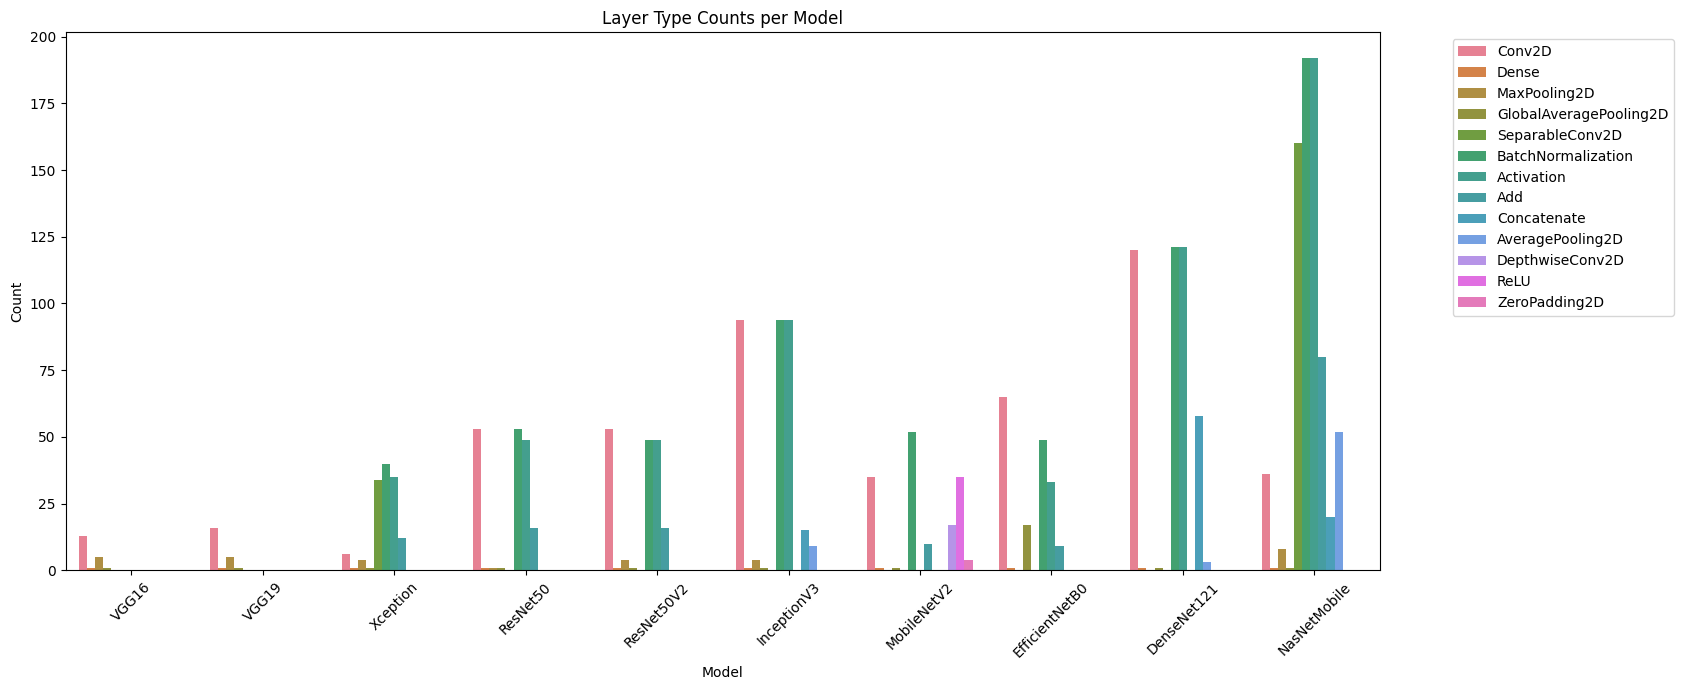

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

accuracies = {
    'VGG16': 0.0895,
    'VGG19': 0.031,
    'Xception': 0.052,
    'ResNet50': 0.0725,
    'ResNet50V2': 0.07,
    'InceptionV3': 0.043,
    'MobileNetV2': 0.026,
    'EfficientNetB0': 0.046,
    'DenseNet121': 0.058,
    'NasNetMobile': 0.039
}

layer_counts = {
    'VGG16': {'Conv2D': 13, 'Dense': 1, 'MaxPooling2D': 5, 'GlobalAveragePooling2D': 1},
    'VGG19': {'Conv2D': 16, 'Dense': 1, 'MaxPooling2D': 5, 'GlobalAveragePooling2D': 1},
    'Xception': {'Conv2D': 6, 'SeparableConv2D': 34, 'BatchNormalization': 40, 'Activation': 35, 'Add': 12,
                 'MaxPooling2D': 4, 'GlobalAveragePooling2D': 1, 'Dense': 1},
    'ResNet50': {'Conv2D': 53, 'BatchNormalization': 53, 'Activation': 49, 'Add': 16,
                 'MaxPooling2D': 1, 'GlobalAveragePooling2D': 1, 'Dense': 1},
    'ResNet50V2': {'Conv2D': 53, 'BatchNormalization': 49, 'Activation': 49, 'Add': 16,
                   'MaxPooling2D': 4, 'GlobalAveragePooling2D': 1, 'Dense': 1},
    'InceptionV3': {'Conv2D': 94, 'BatchNormalization': 94, 'Activation': 94, 'Concatenate': 15,
                    'MaxPooling2D': 4, 'AveragePooling2D': 9, 'GlobalAveragePooling2D': 1, 'Dense': 1},
    'MobileNetV2': {'Conv2D': 35, 'DepthwiseConv2D': 17, 'ReLU': 35, 'BatchNormalization': 52, 'Add': 10,
                    'ZeroPadding2D': 4, 'GlobalAveragePooling2D': 1, 'Dense': 1},
    'EfficientNetB0': {'Conv2D': 65, 'BatchNormalization': 49, 'Activation': 33, 'Add': 9,
                       'GlobalAveragePooling2D': 17, 'Dense': 1},
    'DenseNet121': {'Conv2D': 120, 'BatchNormalization': 121, 'Activation': 121, 'Concatenate': 58,
                    'AveragePooling2D': 3, 'GlobalAveragePooling2D': 1, 'Dense': 1},
    'NasNetMobile': {'Conv2D': 36, 'SeparableConv2D': 160, 'BatchNormalization': 192, 'Activation': 192, 'Add': 80,
                     'AveragePooling2D': 52, 'Concatenate': 20, 'MaxPooling2D': 8, 'GlobalAveragePooling2D': 1, 'Dense': 1}
}

plt.figure(figsize=(12, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="Blues_d")
plt.title("Model Accuracy Scores")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

flat_layer_data = []
for model, layers in layer_counts.items():
    for layer, count in layers.items():
        flat_layer_data.append({'Model': model, 'LayerType': layer, 'Count': count})

df_layers = pd.DataFrame(flat_layer_data)

plt.figure(figsize=(14, 7))
sns.barplot(data=df_layers, x='Model', y='Count', hue='LayerType')
plt.title("Layer Type Counts per Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
import numpy as np

def summarize_model_params(models, input_shape=(224, 224, 3)):
    for model in models:
        print(f"Model: {model.name}")

        param_count = model.count_params()
        print(f"Total Parameters: {param_count:,}")

        size_mb = param_count * 4 / (1024 ** 2)
        print(f"Estimated Size: {size_mb:.2f} MB")

        print("—" * 40)
        
summarize_model_params(models)

Model: VGG16
Total Parameters: 14,724,948
Estimated Size: 56.17 MB
————————————————————————————————————————
Model: VGG19
Total Parameters: 20,034,644
Estimated Size: 76.43 MB
————————————————————————————————————————
Model: Xception
Total Parameters: 20,902,460
Estimated Size: 79.74 MB
————————————————————————————————————————
Model: ResNet50
Total Parameters: 23,628,692
Estimated Size: 90.14 MB
————————————————————————————————————————
Model: ResNet50V2
Total Parameters: 23,605,780
Estimated Size: 90.05 MB
————————————————————————————————————————
Model: InceptionV3
Total Parameters: 21,843,764
Estimated Size: 83.33 MB
————————————————————————————————————————
Model: MobileNetV2
Total Parameters: 2,283,604
Estimated Size: 8.71 MB
————————————————————————————————————————
Model: EfficientNetB0
Total Parameters: 4,075,191
Estimated Size: 15.55 MB
————————————————————————————————————————
Model: DenseNet121
Total Parameters: 7,058,004
Estimated Size: 26.92 MB
———————————————————————————————————

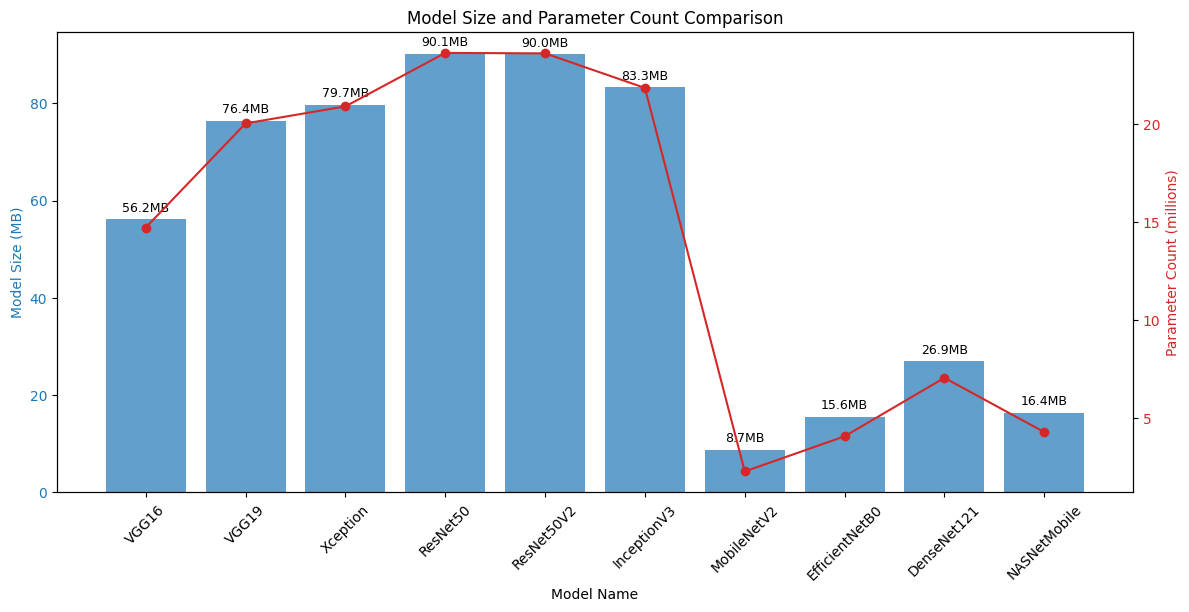

In [ ]:
import matplotlib.pyplot as plt

model_names = [
    "VGG16", "VGG19", "Xception", "ResNet50", "ResNet50V2",
    "InceptionV3", "MobileNetV2", "EfficientNetB0", "DenseNet121", "NASNetMobile"
]
param_counts = [
    14724948, 20034644, 20902460, 23628692, 23605780,
    21843764, 2283604, 4075191, 7058004, 4290856
]
model_sizes = [
    56.17, 76.43, 79.74, 90.14, 90.05,
    83.33, 8.71, 15.55, 26.92, 16.37
]

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Model Name')
ax1.set_ylabel('Model Size (MB)', color=color)
bars = ax1.bar(model_names, model_sizes, color=color, alpha=0.7, label='Model Size (MB)')
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=45)

# Annotate sizes
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval:.1f}MB', ha='center', va='bottom', fontsize=9)

# Create a second y-axis for parameter counts
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Parameter Count (millions)', color=color)
ax2.plot(model_names, [p / 1e6 for p in param_counts], color=color, marker='o', label='Parameters (M)')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Model Size and Parameter Count Comparison')
plt.show()


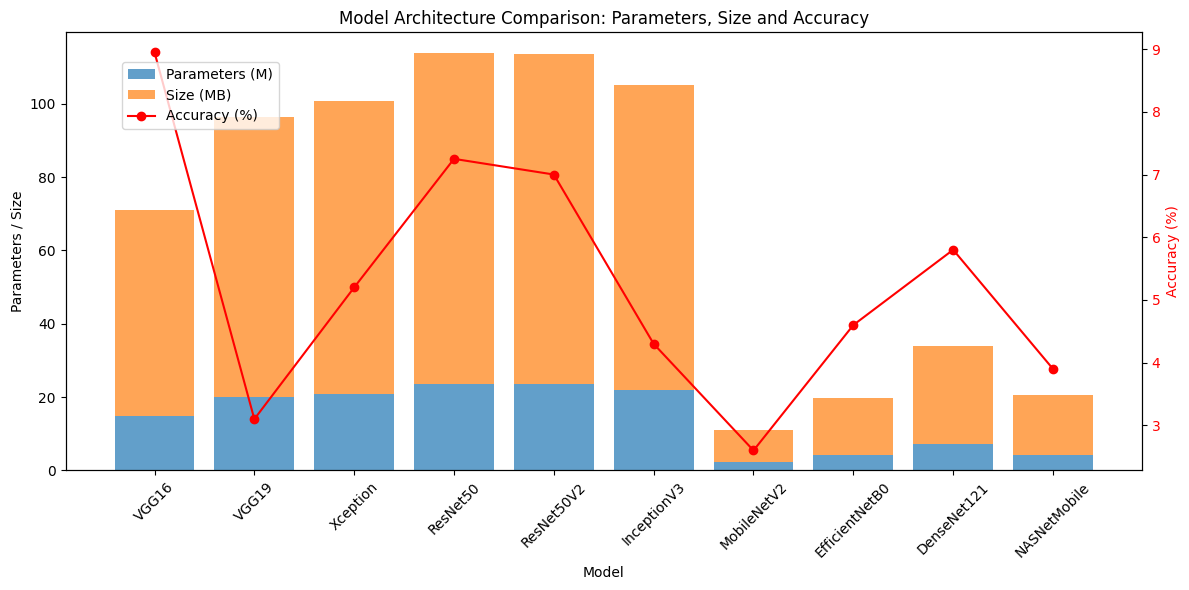

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Model": [
        "VGG16", "VGG19", "Xception", "ResNet50", "ResNet50V2", "InceptionV3",
        "MobileNetV2", "EfficientNetB0", "DenseNet121", "NASNetMobile"
    ],
    "Parameters (M)": [14.72, 20.03, 20.90, 23.63, 23.61, 21.84, 2.28, 4.08, 7.06, 4.29],
    "Size (MB)": [56.17, 76.43, 79.74, 90.14, 90.05, 83.33, 8.71, 15.55, 26.92, 16.37],
    "Accuracy (%)": [8.95, 3.10, 5.20, 7.25, 7.00, 4.30, 2.60, 4.60, 5.80, 3.90]
}

df = pd.DataFrame(data)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(df['Model'], df['Parameters (M)'], label='Parameters (M)', alpha=0.7)
ax1.bar(df['Model'], df['Size (MB)'], bottom=df['Parameters (M)'], label='Size (MB)', alpha=0.7)
ax1.set_ylabel('Parameters / Size')
ax1.set_xlabel('Model')
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.plot(df['Model'], df['Accuracy (%)'], color='red', marker='o', label='Accuracy (%)')
ax2.set_ylabel('Accuracy (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.title("Model Architecture Comparison: Parameters, Size and Accuracy")
plt.tight_layout()
plt.show()
